In [304]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [305]:
X , y = make_classification(n_samples=100, # No of rows
                            n_features=2,  # No of columns in X 
                            n_informative=1, # No of columns in X
                            n_redundant=0, # No of redundant columns in X
                            n_classes=2, # No of labels in y column
                            n_clusters_per_class=1, # No of clusters in each class
                            hypercube=False, # If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
                            class_sep=10, # Seperatin distance per class
                            random_state = 41
                            )

In [306]:
X.shape,y.shape # Shape of the dataset made

((100, 2), (100,))

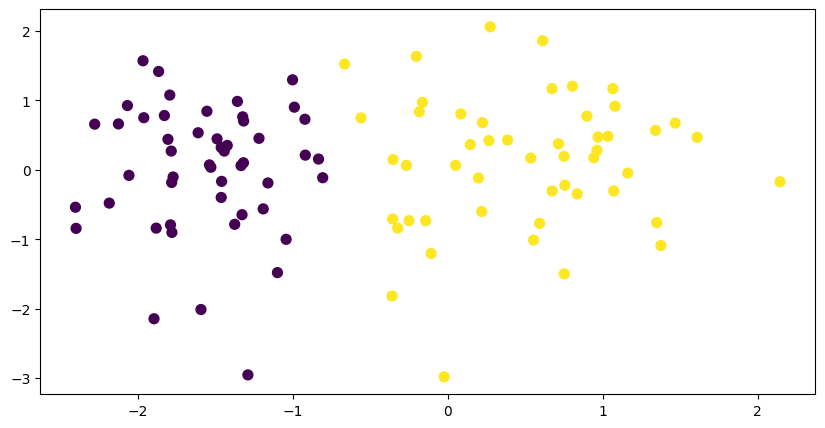

In [307]:
plt.figure(figsize=(10,5)) 
plt.scatter(X[:,0],X[:,1],c=y,s=50) # Plotting the X points 
plt.show()

In [308]:
# Now creating the perceptron from scratch 
class pereceptron:
    def __init__(self,learning_rate=0.1,epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None

        # Arrays for m and b in each iteration
        self.m = []
        self.b = []
    def step(self,z):
        return 1 if z>0 else 0
    
    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1) # Creates a column for the coeffecients of w
        w = np.ones(X.shape[1]) # Creates a matrix (1 * n ) where n is the value passed

        # Now iterating over epochs times:
        for i in range(self.epochs):
            # As the formula : Wnew = Wold - lr*(y - y_hat)*X

            # First lets pick the random point index for the iteration
            j = np.random.randint(0,X.shape[0])

            # Second creating y_hat
            y_hat = self.step(np.dot(X[j],w))

            # Now lets upadte w value . 
            w = w + self.lr*(y[j] - y_hat)*X[j]

            self.coef = w[1:]
            self.intercept = w[0]
            
            # The process we did explicilty will be done here automatically
            self.m.append(-(w[1]/w[2])) 
            self.b.append(-(w[0]/w[1]))

        return f"Intercept : {w[1:]}  Coeffecient : {w[0]}"
    
    def params(self):
        return self.m,self.b

        

In [309]:
prc = pereceptron() # Instantiate the perceptron

In [310]:
prc.fit(X,y) # fit the data

'Intercept : [1.3505303  0.16035877]  Coeffecient : 0.9'

In [311]:
# Now lets plot the line that is acting like a seperation boundary for classification
# For this lets first calculate m and b value

m = - ( prc.coef[0] / prc.coef[1] ) # m = - A/B
b = - ( prc.intercept / prc.coef[1] ) # b = - C/B

In [312]:
# Now making x and y values for the line equation
x_ip = np.linspace(-3,3,X.shape[0]) # (-y boundary, + y boundary ,X.shape[0])
y_ip = (m*x_ip)+ b  # y = m*x + b

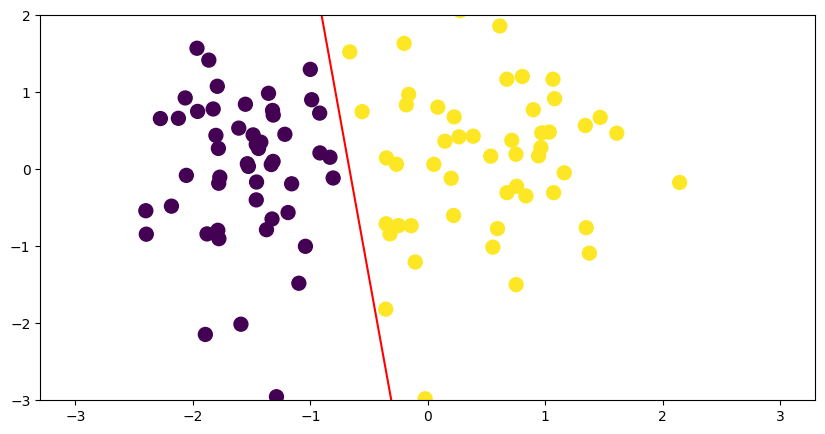

In [313]:
# Plotting the same graph as above but with the line
plt.figure(figsize=(10,5))
plt.plot(x_ip,y_ip,c='r') # Plotting the line we created with the coef of m and b 
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.ylim(-3,2) # Sets the y limit for both the axes 
plt.show()

In [317]:
# Acessing m and b of each iteration
# Note this is just made for accessing and making animations using FuncAnimation for the above which maybe done in future
m ,b = (prc.params())  